In [55]:
import pandas as pd
import re
import string

import nltk
nltk.download('stopwords')
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Crrea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df = pd.read_csv('wine.csv')
df.shape

(11258, 10)

In [22]:
df = df.dropna(subset=['description'])
df.shape

(129971, 14)

In [27]:
varietals = ' '.join(df.variety.unique().tolist()).lower()
varietals = re.sub('-', ' ', varietals)
varietals = varietals.split()

In [53]:
nlp = spacy.load('en_core_web_sm')

def clean_string(text):

    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    text = re.sub('\n', '', text)

    # Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Lemmatize
    text = nlp(text)
    text = [y.lemma_ for y in text]
    
    # Convert to list
    # text = text.split()
    
    # Remove stop words
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + varietals + ['drink', 'wine']

    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub('\w*\d\w*', '', w) for w in text_filtered]


    final_string = ' '.join(text_filtered)

    return final_string

In [54]:
df['description_clean'] = df['description'].apply(lambda x: clean_string(x))

In [56]:
df['description_clean'][0]

'include blackpurple color thick density dusty fruit cedar tar tobacco weave blackberry currant finishing powerful grip tannin'

In [57]:
vectorsize = TfidfVectorizer()
X = vectorsize.fit_transform(df['description_clean'])

In [64]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(init="k-means++", n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

c:\Users\Crrea\miniconda3\envs\infnet-nn\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


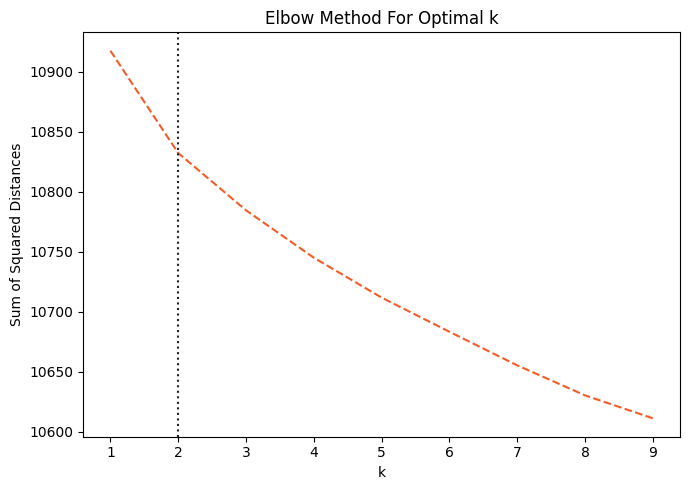

In [66]:
plt.figure(figsize=(7,5))
ax = sns.lineplot(x=K, y=Sum_of_squared_distances)

ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#F25D27")

plt.axvline(2, color='#1A2226', linestyle=':')

plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')

plt.tight_layout()
plt.savefig('textclustering_elbow.png', dpi=300)
plt.show()


In [68]:
def get_silhouette_score(X, K):
    for n_clusters in range(2, k):
        cluster = KMeans(init="k-means++", n_clusters=n_clusters, random_state=42)
        y = cluster.fit_predict(X)

        message = "For n_clusters = {} Teh average silhouette_score is: {}"
        print(message.format(n_clusters, silhouette_score(X,y)))
        
get_silhouette_score(X,10)


c:\Users\Crrea\miniconda3\envs\infnet-nn\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 Teh average silhouette_score is: 0.008243752567389198


c:\Users\Crrea\miniconda3\envs\infnet-nn\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 Teh average silhouette_score is: 0.0065691072363334106


c:\Users\Crrea\miniconda3\envs\infnet-nn\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 Teh average silhouette_score is: 0.006407296518608443


c:\Users\Crrea\miniconda3\envs\infnet-nn\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 Teh average silhouette_score is: 0.006594136708517243


c:\Users\Crrea\miniconda3\envs\infnet-nn\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 Teh average silhouette_score is: 0.005021715140636729


c:\Users\Crrea\miniconda3\envs\infnet-nn\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 Teh average silhouette_score is: 0.005983325072188442


c:\Users\Crrea\miniconda3\envs\infnet-nn\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 Teh average silhouette_score is: 0.0058249898897724025


In [70]:
k = 2

vectorsize = TfidfVectorizer()
X = vectorsize.fit_transform(df['description_clean'])

model = KMeans(init="k-means++", n_clusters=k, max_iter=25, n_init=1)
model.fit(X)

KMeans(max_iter=25, n_clusters=2, n_init=1)

In [72]:
clust_labels = model.predict(X)
cent = model.cluster_centers_

kmeans_labels = pd.DataFrame(clust_labels)
df.insert((df.shape[1]), 'clusters', kmeans_labels)

In [73]:
df.sample(5, random_state=3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,description_clean,clusters
2131,US,If you like your white wines with a white suga...,Estate,82,16.0,California,Dry Creek Valley,Sonoma,Sauvignon Blanc,Mill Creek,like sugary finish taste like apricot pineappl...,1
641,US,"Feels harsh and tart in the mouth, with sharp ...",Crazy Creek Vineyard Estate Bottled,82,40.0,California,Alexander Valley,Sonoma,Cabernet Sauvignon,DeLorimier,feel harsh tart mouth sharp acidity give oakyc...,0
1964,US,Hot in alcohol and seemingly sweet in black cu...,Estate Grown,83,30.0,California,Dry Creek Valley,Sonoma,Malbec,Mounts,hot alcohol seemingly sweet currant chocolate ...,0
4684,US,"Made without oak, although the wine has a tart...",Unoaked,86,18.0,California,Russian River Valley,Sonoma,Chardonnay,Sebastiani,make without oak although tart leanness would ...,1
2512,US,This is an enormously fruity Zinfandel that of...,Bradford Mountain Vineyard,91,32.0,California,Dry Creek Valley,Sonoma,Zinfandel,Peterson,enormously fruity offer flood flavor make inst...,0


In [74]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorsize.get_feature_names_out()

results_dict = {}

for i in range(k):
    terms_list = []

    for ind in order_centroids[i, :15]:
        terms_list.append(terms[ind])

    results_dict[f'Cluster {i}'] = terms_list

df_cluster = pd.DataFrame.from_dict(results_dict)
df_cluster

,Cluster 0,Cluster 1
0,cherry,pineapple
1,flavor,flavor
2,dry,acidity
3,blackberry,vanilla
4,tannin,fruit
5,raspberry,oak
6,cola,crisp
7,good,pear
8,currant,apple
9,rich,peach


In [75]:
new_docs = ['Rich deep color of oak and chocolate.',
            'Light and crisp with a hint of vanilla.',
            'Hints of citrus and melon.',
            'Dark raspberry and black cherry flavors.']

pred = model.predict(vectorsize.transform(new_docs))
print(pred)

[0 1 1 0]
